# G@C營運成本 + G@C回收量 + G@C回收佔香港總回收量佔比

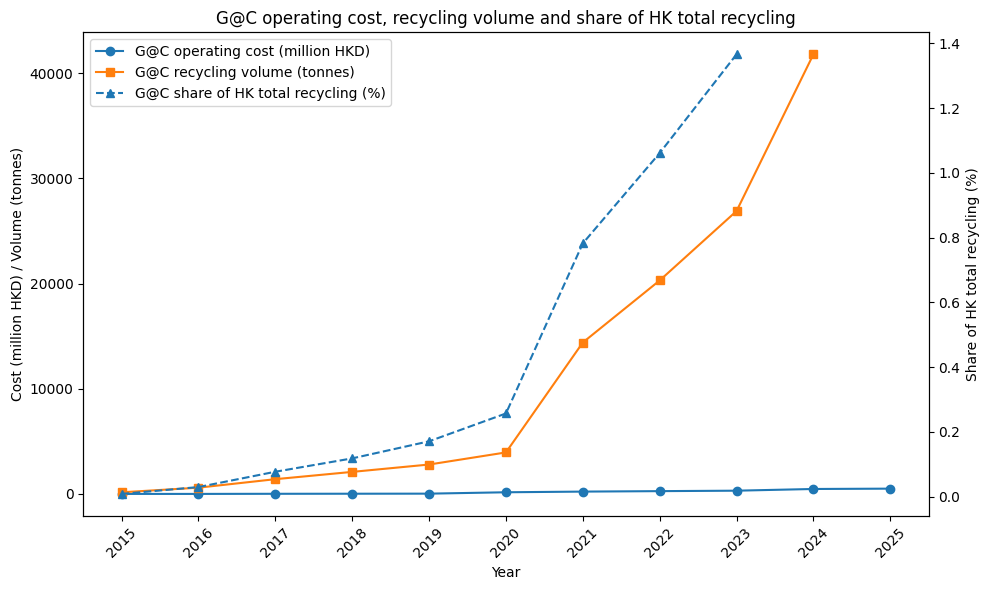

In [3]:
# ==== Install required packages (run these in a terminal, not inside Python) ====
# pip install pandas matplotlib openpyxl

import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------------
# 1. Load data from the Excel file
# -------------------------------------------------------
excel_path = "../General Stats_G@C_clean.xlsx"

# Sheet with HK MSW & G@C recycling volume / share
hk = pd.read_excel(
    excel_path,
    sheet_name="HK MSW Volume and Recycling Rat"
)

# Sheet with G@C total operating cost
gc = pd.read_excel(
    excel_path,
    sheet_name="G@C Recyclables Collection Volu"
)

# -------------------------------------------------------
# 2. Prepare and merge the relevant data
# -------------------------------------------------------

# Keep only the columns we need from the HK sheet
hk_sub = hk[[
    "Year",
    "G@C recyclables collection volume (tonnes)",
    "G@C share of HK total MSW recycling"
]].dropna(subset=["Year"]).copy()

# Convert year to integer (e.g. 2015.0 -> 2015)
hk_sub["Year_int"] = hk_sub["Year"].astype(int)

# Extract the starting year (first 4 digits) from the G@C fiscal year text
# e.g. "2015-16" -> 2015, "2025-26 (budget)" -> 2025
gc["Year_num"] = gc["Year"].astype(str).str[:4].astype(int)

# Keep only total operating cost + the numeric year
gc_sub = gc[["Year_num", "G@C total operating cost"]].copy()

# Merge: calendar year from HK sheet with operating cost from G@C sheet
merged = (
    hk_sub.merge(
        gc_sub,
        left_on="Year_int",
        right_on="Year_num",
        how="inner"
    )
    .sort_values("Year_int")
)

# Scale operating cost to millions for easier plotting
merged["operating_cost_million"] = merged["G@C total operating cost"] / 1_000_000

# Convert share to percentage
merged["share_percent"] = merged["G@C share of HK total MSW recycling"] * 100

# -------------------------------------------------------
# 3. Plot: one graph with three series
#    - G@C operating cost (million HKD)
#    - G@C recycling volume (tonnes)
#    - G@C share of Hong Kong’s total recycling (%)
# -------------------------------------------------------

fig, ax1 = plt.subplots(figsize=(10, 6))

x = merged["Year_int"]

# Left Y-axis: operating cost and recycling volume
line1, = ax1.plot(
    x,
    merged["operating_cost_million"],
    marker="o",
    linestyle="-",
    label="G@C operating cost (million HKD)",
)
line2, = ax1.plot(
    x,
    merged["G@C recyclables collection volume (tonnes)"],
    marker="s",
    linestyle="-",
    label="G@C recycling volume (tonnes)",
)

ax1.set_xlabel("Year")
ax1.set_ylabel("Cost (million HKD) / Volume (tonnes)")
ax1.set_xticks(x)
ax1.set_xticklabels(x, rotation=45)

# Right Y-axis: share of HK total recycling (%)
ax2 = ax1.twinx()
line3, = ax2.plot(
    x,
    merged["share_percent"],
    marker="^",
    linestyle="--",
    label="G@C share of HK total recycling (%)",
)
ax2.set_ylabel("Share of HK total recycling (%)")

# Combine legends from both axes
lines = [line1, line2, line3]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.title("G@C operating cost, recycling volume and share of HK total recycling")
plt.tight_layout()
plt.show()
